## `thermo` showcase

A small show case on how to use `pyvibtools`' `thermo` function in a python script. 

In [1]:
from pyvibtools import *
from ase import Atoms
import numpy as np

In the same `example/` directory as this notebook, there are files `struc.xyz`, `numhess`, and `dipgrad`, which contain a molecule, its numerical Hessian and dipole gradient, respectively.

`pyvibtools` can read these files and process them:

In [2]:
# Initialize empty vibspec
vibspec = vibtoolsCalculator()

# Read the files from the example directory
vibspec.read(xyzfile='struc.xyz', hessfile='numhess', dipfile='dipgrad')

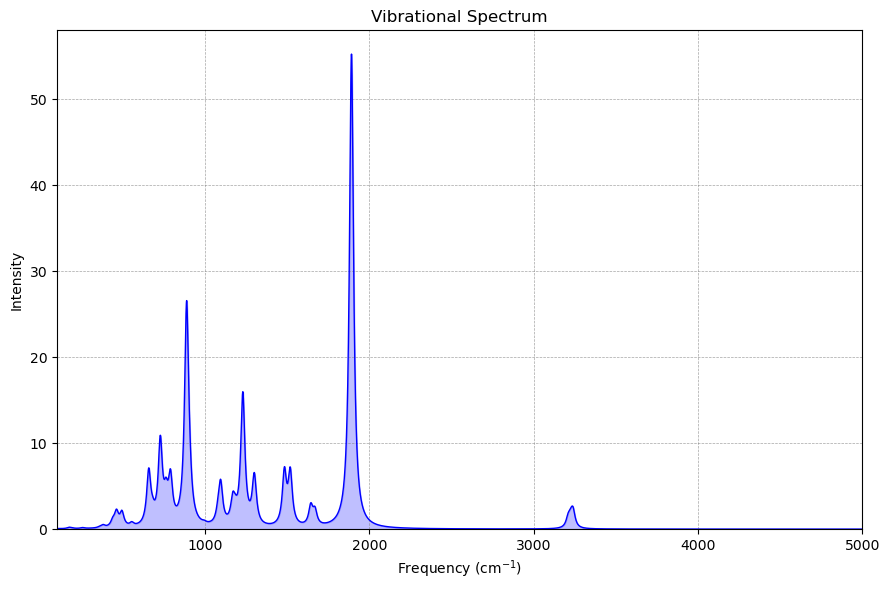

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Vibrational Spectrum'}, xlabel='Frequency (cm$^{-1}$)', ylabel='Intensity'>)

In [3]:
# To test the successfull read-in, calculate and plot the spectrum
vibspec.plot()

Having read-in a structure and Hessian, `pyvibtools` now can calculate the frequencies and perform thermostatistical calculations.
For this purpose, the `vibtoolsCalculator` implements a `thermo` function that can be initialized with a temperature, frequency scaling factor, and symmetry symbol for the molecule. The defaults are **298.15 K** and **C<sub>1</sub>** symmetry.

The parameters `sthr` (default: 25.0 cm<sup>-1</sup>) and `ithr` (default: -50.0 cm<sup>-1</sup>) are the cut-offs for Grimme's rigid-rotor/harmonic-oscillator interpolation for the entropy (see [S. Grimme, *Chem. Eur. J.*, **2012**, *18*, 9955-9964](https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/chem.201200497) and [P. Pracht, S. Grimme, *Chem. Sci.*, **2021**, *12*, 6551-6568](https://pubs.rsc.org/en/content/articlelanding/2021/sc/d1sc00621e)
) and the imaginary frequency inversion threshold, respectively. 


In [4]:
# Calculate (and print) thermo information for the given molecule
# stdout printout can be supressed by setting verbosity to 0 (the default)
result_dict = vibspec.thermo(T=298.15, fscal=1.0, ithr=-50.0, sthr=25.0, sym='c1', verbosity=1)

   ...................................................
   :                  THERMO SETUP                   :
   :.................................................:
   :  # frequencies                          36      :
   :  # imaginary                            0       :
   :  temperature                        298.15 K    :
   :  symmetry                               c1      :
   :  rotational number                       1      :
   :  scaling factor                  1.0000000      :
   :  rotor cutoff                   25.0000000 cm⁻¹ :
   :  imag. cutoff                  -50.0000000 cm⁻¹ :
   :.................................................:

THERMO Results
 Heat capacity [Cp(T)]      5.23251990e-05 Eh, 3.28345595e+01 cal/mol/K

 ZPVE                       9.20042114e-02 Eh  
 Enthalpy [H(0)-H(T)+PV]    9.47053317e-03 Eh
 -------------------------------------------
                            1.01474745e-01 Eh

 Entropy [S]                1.49488492e-04 Eh, 9.38054486e+01 cal

Note, the **`thermo`** routine's output is a dictionary (here **`result_dict`**) containing the results in Hartree energy units and the temperature in Kelvin.

In [5]:
print(result_dict)

{'zpve': 0.09200421143177104, 'H(T)': 0.10147474460190885, 'enthalpy': 0.009470533170137808, 'T*S': 0.044569993771608744, 'Cp(T)': 5.2325199012233394e-05, 'G(T)': 0.0569047508303001, 'temperature': 298.15}


---

### Loading vibspectra

It is possible to load vibrational spectra rather than the plain Hessian. However, since the translational and rotational partition functions require structure information, a fitting input structure must be provided as well.

In [6]:
from pyvibtools import *

# initialize a new vibtoolsCalculator and read files
vibspec = vibtoolsCalculator()
vibspec.read(xyzfile='struc.xyz', vibspecfile='vibspectrum.ref')

# Calculate the thermo contributions
result_dict = vibspec.thermo(T=298.15, fscal=1.0, ithr=-50.0, sthr=25.0, sym='c1', verbosity=1)

   ...................................................
   :                  THERMO SETUP                   :
   :.................................................:
   :  # frequencies                          36      :
   :  # imaginary                            0       :
   :  temperature                        298.15 K    :
   :  symmetry                               c1      :
   :  rotational number                       1      :
   :  scaling factor                  1.0000000      :
   :  rotor cutoff                   25.0000000 cm⁻¹ :
   :  imag. cutoff                  -50.0000000 cm⁻¹ :
   :.................................................:

THERMO Results
 Heat capacity [Cp(T)]      5.30389052e-05 Eh, 3.32824169e+01 cal/mol/K

 ZPVE                       8.87824936e-02 Eh  
 Enthalpy [H(0)-H(T)+PV]    9.45870680e-03 Eh
 -------------------------------------------
                            9.82412004e-02 Eh

 Entropy [S]                1.49099697e-04 Eh, 9.35614765e+01 cal

---

### Investigating temperature dependence

One useful investigation is the study of the temperature dependence of a molecule's thermostatistical contributions.
The output dictionarys of `thermo` can easily be collected in a `pandas` dataframe:

In [7]:
import pandas as pd

temperature_range = [temp for temp in range(10, 501, 10)]  # 10 K to 500 K in steps of 10
data_list = [vibspec.thermo(T=temp, verbosity=0) for temp in temperature_range]

# Create a DataFrame
df = pd.DataFrame(data_list)

print(df)

        zpve      H(T)  enthalpy       T*S     Cp(T)      G(T)  temperature
0   0.088782  0.088910  0.000128  0.000721  0.000014  0.088189           10
1   0.088782  0.089051  0.000269  0.001637  0.000015  0.087414           20
2   0.088782  0.089204  0.000422  0.002639  0.000016  0.086565           30
3   0.088782  0.089366  0.000584  0.003702  0.000016  0.085665           40
4   0.088782  0.089539  0.000756  0.004815  0.000017  0.084723           50
5   0.088782  0.089722  0.000939  0.005975  0.000019  0.083747           60
6   0.088782  0.089916  0.001134  0.007176  0.000020  0.082740           70
7   0.088782  0.090123  0.001340  0.008418  0.000021  0.081705           80
8   0.088782  0.090342  0.001560  0.009699  0.000022  0.080643           90
9   0.088782  0.090575  0.001792  0.011018  0.000024  0.079557          100
10  0.088782  0.090821  0.002039  0.012373  0.000025  0.078448          110
11  0.088782  0.091082  0.002299  0.013766  0.000026  0.077316          120
12  0.088782

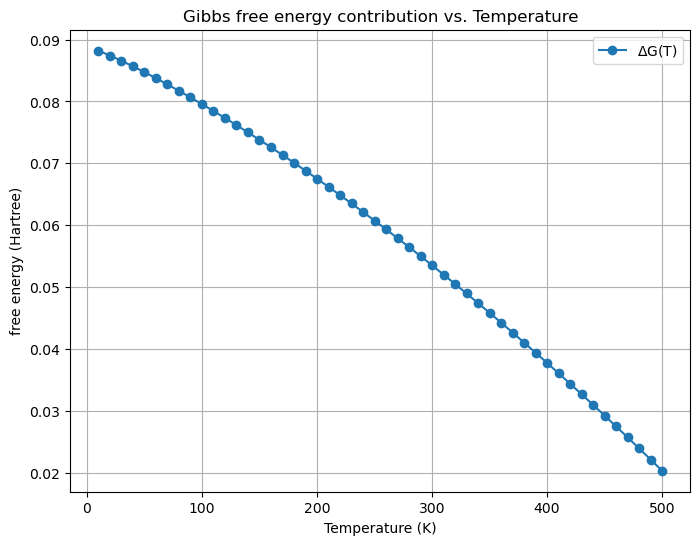

In [8]:
# plot the heat capacity column as an example
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(df["temperature"], df["G(T)"], marker='o', linestyle='-', label=r'$\Delta$G(T)')

# Adding labels and title
plt.xlabel("Temperature (K)")
plt.ylabel("free energy (Hartree)")
plt.title("Gibbs free energy contribution vs. Temperature")
plt.grid(True)  # Add grid for better readability
plt.legend()  # Add a legend

# Display the plot
plt.show()
